In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#  Load and Prepare Dataset

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


# Normalize Features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train SVM (Linear Kernel)

In [13]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.956140350877193
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Train SVM (RBF Kernel)

In [16]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Hyperparameter Tuning using Grid Search

In [19]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best RBF Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best RBF Accuracy: 0.9736842105263158
[[41  2]
 [ 1 70]]


# Cross-Validation Score

In [22]:
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9736376339077782


# Visualize 2D Decision Boundary

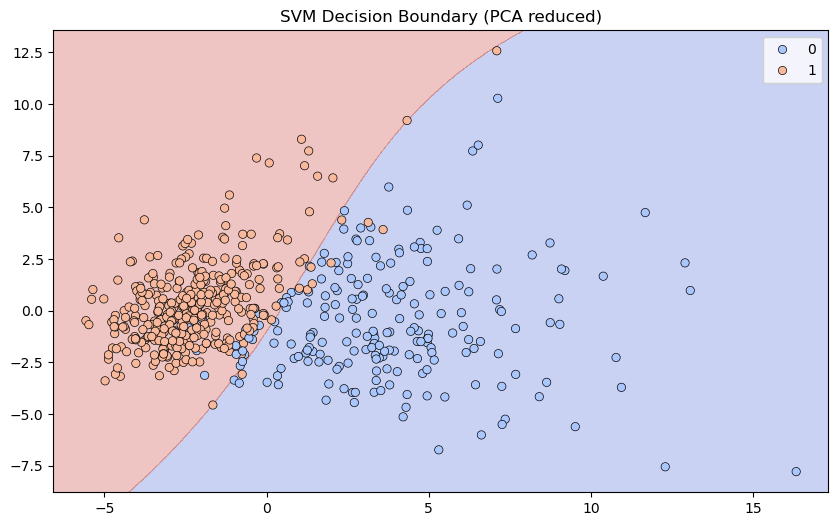

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_vis = SVC(kernel='rbf', C=1.0, gamma=0.01)
svm_vis.fit(X_train_pca, y_train_pca)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title('SVM Decision Boundary (PCA reduced)')
    plt.show()

plot_decision_boundary(svm_vis, X_pca, y)
